In [1]:
!pip install mplsoccer -- quiet
import re
import requests
import json
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, Pitch
import pandas as pd

ERROR: Could not find a version that satisfies the requirement quiet (from versions: none)
ERROR: No matching distribution found for quiet


In [78]:
base_url = 'https://understat.com/match/'
match = str(input('Please enter match id: '))
url = base_url + match

Please enter match id:  27859


In [79]:
url

'https://understat.com/match/27859'

In [80]:
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

In [81]:
strings = scripts[1].string

In [82]:
ind_start = strings.index("('")+2
ind_end = strings.index("')")
json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)

In [83]:
data

{'h': [{'id': '607800',
   'minute': '13',
   'result': 'BlockedShot',
   'X': '0.7959999847412109',
   'Y': '0.36400001525878906',
   'xG': '0.09183487296104431',
   'player': 'Benjamin Henrichs',
   'h_a': 'h',
   'player_id': '435',
   'situation': 'DirectFreekick',
   'season': '2024',
   'shotType': 'RightFoot',
   'match_id': '27859',
   'h_team': 'RasenBallsport Leipzig',
   'a_team': 'Eintracht Frankfurt',
   'h_goals': '2',
   'a_goals': '1',
   'date': '2024-12-15 18:30:00',
   'player_assisted': None,
   'lastAction': 'Standard'},
  {'id': '607801',
   'minute': '13',
   'result': 'MissedShots',
   'X': '0.8',
   'Y': '0.42700000762939455',
   'xG': '0.026957938447594643',
   'player': 'Benjamin Henrichs',
   'h_a': 'h',
   'player_id': '435',
   'situation': 'SetPiece',
   'season': '2024',
   'shotType': 'LeftFoot',
   'match_id': '27859',
   'h_team': 'RasenBallsport Leipzig',
   'a_team': 'Eintracht Frankfurt',
   'h_goals': '2',
   'a_goals': '1',
   'date': '2024-12-15

In [84]:
x = []
y = []
min = []
xg = []
result = []
player = []
team = []
data_away = data['a']
data_home = data['h']

In [85]:
for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'X':
            x.append(data_home[index][key])
        if key == 'Y':
            y.append(data_home[index][key])
        if key == 'minute':
            min.append(data_home[index][key])
        if key == 'xG':
            xg.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])
        if key == 'player':
            player.append(data_home[index][key])
        if key == 'h_team':
            team.append(data_home[index][key])

for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'X':
            x.append(data_away[index][key])
        if key == 'Y':
            y.append(data_away[index][key])
        if key == 'minute':
            min.append(data_away[index][key])
        if key == 'xG':
            xg.append(data_away[index][key])
        if key == 'result':
            result.append(data_away[index][key])
        if key == 'player':
            player.append(data_away[index][key])
        if key == 'a_team':
            team.append(data_away[index][key])

In [86]:
col_names = ['x','y','min','xg','result','player','team']
shot_df = pd.DataFrame([x,y,min,xg,result,player,team],index=col_names)

In [87]:
df = shot_df.T

In [88]:
df

,x,y,min,xg,result,player,team
0,0.7959999847412109,0.36400001525878906,13,0.09183487296104431,BlockedShot,Benjamin Henrichs,RasenBallsport Leipzig
1,0.8,0.42700000762939455,13,0.026957938447594643,MissedShots,Benjamin Henrichs,RasenBallsport Leipzig
2,0.899000015258789,0.5129999923706055,18,0.4579550623893738,SavedShot,Christoph Baumgartner,RasenBallsport Leipzig
3,0.9690000152587891,0.4209999847412109,18,0.4880363345146179,Goal,Benjamin Sesko,RasenBallsport Leipzig
4,0.9490000152587891,0.385,20,0.3605422079563141,SavedShot,Benjamin Sesko,RasenBallsport Leipzig
5,0.870999984741211,0.655,21,0.044362444430589676,SavedShot,Loïs Openda,RasenBallsport Leipzig
6,0.9030000305175782,0.4209999847412109,21,0.015917368233203888,MissedShots,Willi Orban,RasenBallsport Leipzig
7,0.8469999694824218,0.6730000305175782,34,0.0770045667886734,SavedShot,Loïs Openda,RasenBallsport Leipzig
8,0.775,0.6669999694824219,37,0.036141738295555115,MissedShots,Antonio Nusa,RasenBallsport Leipzig
9,0.7469999694824219,0.4909999847412109,42,0.023861246183514595,BlockedShot,Benjamin Sesko,RasenBallsport Leipzig


In [89]:
df = df[df['xg'].notna()]

In [90]:
df

,x,y,min,xg,result,player,team
0,0.7959999847412109,0.36400001525878906,13,0.09183487296104431,BlockedShot,Benjamin Henrichs,RasenBallsport Leipzig
1,0.8,0.42700000762939455,13,0.026957938447594643,MissedShots,Benjamin Henrichs,RasenBallsport Leipzig
2,0.899000015258789,0.5129999923706055,18,0.4579550623893738,SavedShot,Christoph Baumgartner,RasenBallsport Leipzig
3,0.9690000152587891,0.4209999847412109,18,0.4880363345146179,Goal,Benjamin Sesko,RasenBallsport Leipzig
4,0.9490000152587891,0.385,20,0.3605422079563141,SavedShot,Benjamin Sesko,RasenBallsport Leipzig
5,0.870999984741211,0.655,21,0.044362444430589676,SavedShot,Loïs Openda,RasenBallsport Leipzig
6,0.9030000305175782,0.4209999847412109,21,0.015917368233203888,MissedShots,Willi Orban,RasenBallsport Leipzig
7,0.8469999694824218,0.6730000305175782,34,0.0770045667886734,SavedShot,Loïs Openda,RasenBallsport Leipzig
8,0.775,0.6669999694824219,37,0.036141738295555115,MissedShots,Antonio Nusa,RasenBallsport Leipzig
9,0.7469999694824219,0.4909999847412109,42,0.023861246183514595,BlockedShot,Benjamin Sesko,RasenBallsport Leipzig


In [91]:
df.dtypes

x         object
y         object
min       object
xg        object
result    object
player    object
team      object
dtype: object

In [92]:
df.to_csv (r'C:\Users\nj128\OneDrive\Documents\redbull_frankfurt_xG_12_15.csv', index = None, header=True) 

In [93]:
total_shots = df.shape[0]
total_goals = df[df['result'] == 'Goal'].shape[0]
df['xg'] = pd.to_numeric(df['xg'], errors ='coerce')
total_xG = df['xg'].sum()
df['x'] = pd.to_numeric(df['x'],errors = 'coerce')
points_average_distance = df['x'].mean()
actual_average_distance = 120 - (df['x'] * 1.2).mean()

print(f"Total Shots: {total_shots}")
print(f"Total Goals: {total_goals}")
print(f"Total xG: {total_xG:.2f}")
print(f"Points Average Distance: {points_average_distance:.2f}")
print(f"Actual Average Distance: {actual_average_distance:.2f}")

Total Shots: 35
Total Goals: 3
Total xG: 3.35
Points Average Distance: 0.86
Actual Average Distance: 118.96


In [94]:
shot_data = df

NEW DYNAMIC TEAM TEXT VIZ

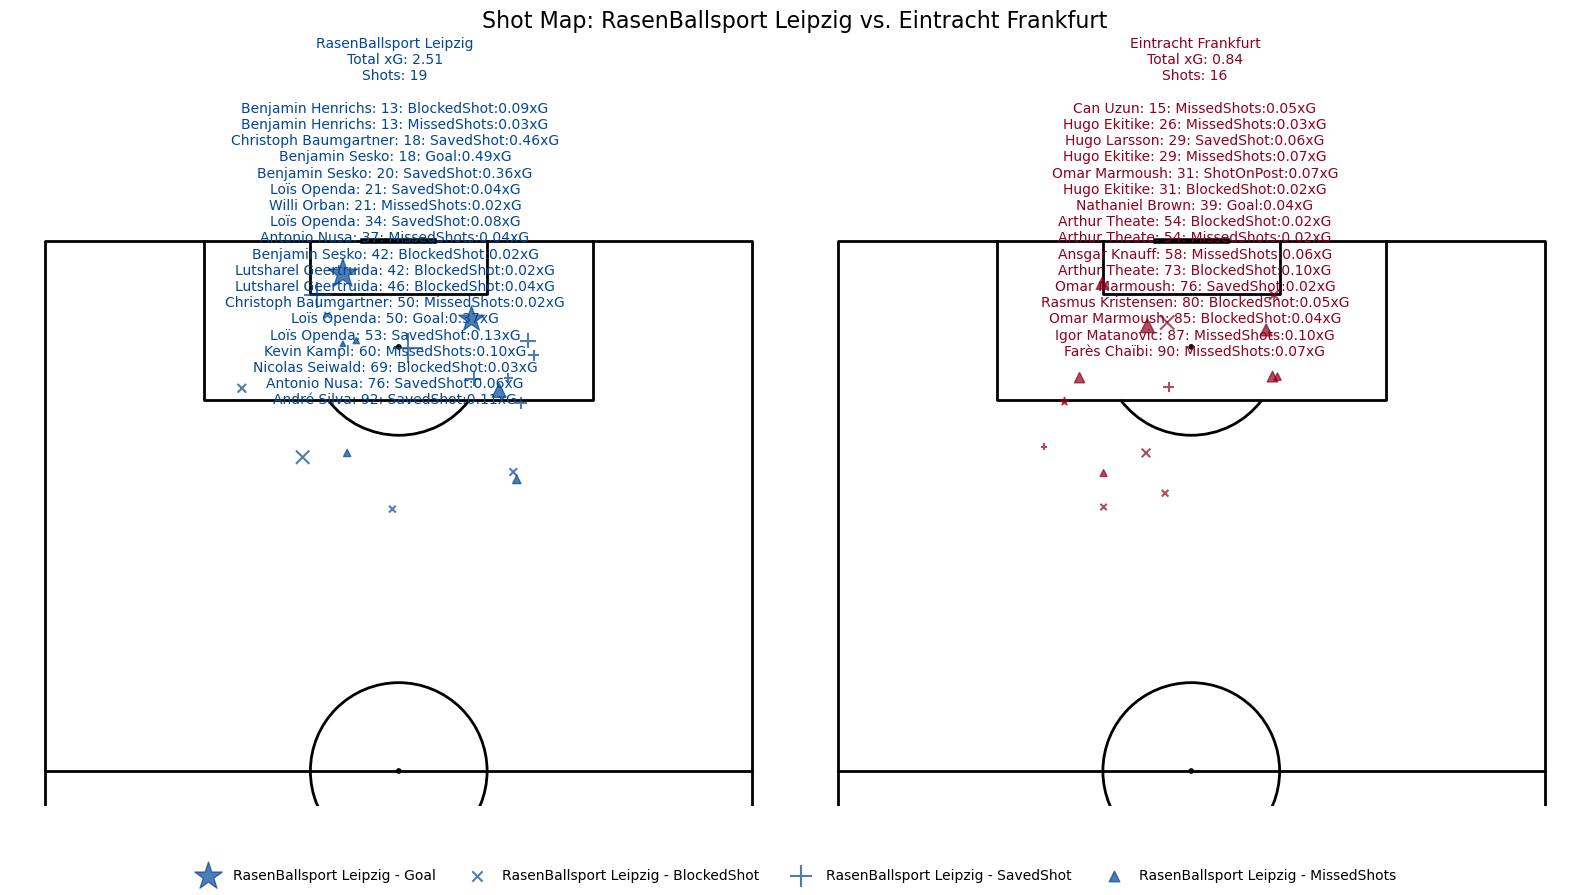

In [95]:
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt
import pandas as pd

# Ensure required columns exist and are numeric
required_columns = {'team', 'result', 'x', 'y', 'xg', 'player'}
if not required_columns.issubset(shot_data.columns):
    raise ValueError(f"shot_data is missing one or more required columns: {required_columns}")

# Convert necessary columns to numeric
for col in ['x', 'y', 'xg']:
    shot_data[col] = pd.to_numeric(shot_data[col], errors='coerce')

# Drop rows with invalid numeric values
shot_data.dropna(subset=['x', 'y', 'xg'], inplace=True)

# Get the unique team names (assume first team is home and second is away)
unique_teams = shot_data['team'].unique()
if len(unique_teams) != 2:
    raise ValueError("Expected exactly two unique teams in the 'team' column.")

home_team, away_team = unique_teams

# Define team colors (unique for each team)
team_colors = {
    home_team: '#034694',  # Blue for Home Team
    away_team: '#8D021F'   # Dark Red for Away Team
}

# Define markers for each shot result
result_markers = {
    'Goal': '*',           # Star
    'BlockedShot': 'x',    # Cross
    'SavedShot': '+',      # Plus
    'MissedShots': '^'     # Triangle
}

# Split the data by team
team_data = {team: shot_data[shot_data['team'] == team] for team in unique_teams}

# Create the figure with two half-pitches
fig, axs = plt.subplots(1, 2, figsize=(16, 9))
pitch = VerticalPitch(pitch_color='white', line_color='black', half=True)

# Prepare player shot summaries
summary_texts = {}
for team in unique_teams:
    team_shots = team_data[team]
    # Create a summary of player names and their xG values
    summary = "\n".join([
        f"{row['player']}: {row['min']}: {row['result']}:{row['xg']:.2f}xG" for _, row in team_shots.iterrows()
    ])
    total_xg = team_shots['xg'].sum()
    total_shots = team_shots.shape[0]
    summary_texts[team] = f"{team}\nTotal xG: {total_xg:.2f}\nShots: {total_shots}\n\n{summary}"

# Plot each half of the pitch
for i, ax in enumerate(axs):
    pitch.draw(ax=ax)  # Draw pitch on each axis

    # Determine team and flip y-axis for away team
    team = home_team if i == 0 else away_team
    data = team_data[team]

    for result, marker in result_markers.items():
        result_data = data[data['result'] == result]
        if not result_data.empty:
            pitch.scatter(
                result_data['x'] * 120,  # Scale x-coordinates
                result_data['y'] * 80 if i == 0 else 80 - result_data['y'] * 80,  # Flip y for away team
                s=result_data['xg'] * 1000,  # Marker size proportional to xG
                color=team_colors[team], marker=marker, alpha=0.7,
                label=f"{team} - {result}" if i == 0 else "", ax=ax
            )
 #   total_xg = data['xg'].sum()
 #   total_shots = data.shape[0]
 #   ax.text(
 #       10, 75,  # Position for text
 #       f"{team}\nTotal xG: {total_xg:.2f}\nShots: {total_shots}",
 #       fontsize=12, color=team_colors[team], ha='left', va='center'
 #   )



# Add a shared title
fig.suptitle(f'Shot Map: {home_team} vs. {away_team}', fontsize=16)

# Add player summaries above the pitches
fig.text(0.25, 0.95, summary_texts[home_team], ha='center', va='top', fontsize=10, color=team_colors[home_team])
fig.text(0.75, 0.95, summary_texts[away_team], ha='center', va='top', fontsize=10, color=team_colors[away_team])

# Add legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, frameon=False, fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.9])  # Adjust layout to fit the text above the pitches
plt.show()
